In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from __future__ import division

In [10]:
file = '/home/dell/Descargas/cluster.csv'
df=pd.read_csv(file)

In [11]:
df.head()

,Equipo,Goles,Tiros,Tiros_buenos,Faltas,Corners,Amarillas,Rojas
0,Man United,2,8,6,11,2,2,0
1,Bournemouth,2,12,4,11,7,1,0
2,Fulham,0,15,6,9,5,1,0
3,Huddersfield,0,6,1,9,2,2,0
4,Newcastle,1,15,2,11,3,2,0


In [12]:
df=df.groupby(['Equipo']).mean()
df.reset_index(inplace=True)

In [13]:
var=[x for x in df.columns if x!='Equipo']

In [14]:
X = df[var].copy()

In [15]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=X.columns)

In [16]:
Xs.head()

,Goles,Tiros,Tiros_buenos,Faltas,Corners,Amarillas,Rojas
0,0.761029,-0.198741,0.006099,0.555323,0.857641,1.679352,0.189993
1,-0.192922,-0.003552,0.059854,0.989713,-0.423766,0.423516,-0.572605
2,-0.226311,-0.636533,-0.428292,-1.442871,-0.109300,0.244921,-0.375806
3,-0.774832,-0.851449,-1.013050,1.174232,-1.076241,-0.537495,1.321590
4,-0.409151,-1.368839,-1.196831,-0.205052,-1.192274,0.896935,-1.507403


In [17]:
prin = ['prin'+str(comp) for comp in range(1,len(var)+1)]
pca = PCA()
pca.fit(Xs)
Xpca = pd.DataFrame(pca.transform(Xs), columns=prin)
Xpca.head()

,prin1,prin2,prin3,prin4,prin5,prin6,prin7
0,-0.026869,0.808277,-1.702696,0.691146,0.671881,0.186292,-0.043940
1,-0.613863,0.063811,-0.723555,-0.818248,-0.215893,0.292998,0.027332
2,-0.203273,-1.288666,0.171928,1.044321,0.096398,-0.301642,0.111525
3,-2.039877,0.999145,1.242725,-0.258766,0.014440,0.357302,-0.160103
4,-1.885428,-1.884785,-0.713727,0.174913,0.087511,0.580284,-0.149027


In [103]:
pca.explained_variance_ratio_.cumsum()

array([0.60719708, 0.78755731, 0.91051913, 0.95551109, 0.98342808,
       0.99538313, 1.        ])

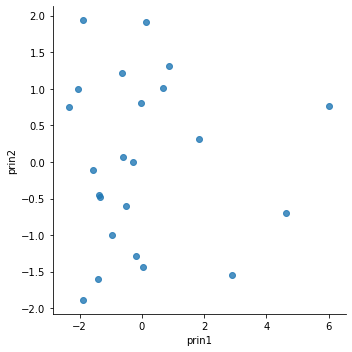

In [18]:
sns.lmplot('prin1','prin2',data=Xpca, fit_reg=False)

In [19]:
lst_in = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(X)
    lst_in.append(cl.inertia_)

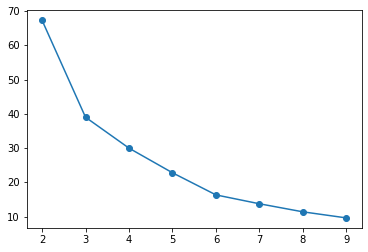

In [20]:
plt.plot(range(2,10),lst_in,marker='o')

In [21]:
gm = GaussianMixture(n_components=6)
gm.fit(Xs)
Xs['clus'] = gm.predict(Xs)
Xs.head()

,Goles,Tiros,Tiros_buenos,Faltas,Corners,Amarillas,Rojas,clus
0,0.761029,-0.198741,0.006099,0.555323,0.857641,1.679352,0.189993,2
1,-0.192922,-0.003552,0.059854,0.989713,-0.423766,0.423516,-0.572605,5
2,-0.226311,-0.636533,-0.428292,-1.442871,-0.109300,0.244921,-0.375806,1
3,-0.774832,-0.851449,-1.013050,1.174232,-1.076241,-0.537495,1.321590,3
4,-0.409151,-1.368839,-1.196831,-0.205052,-1.192274,0.896935,-1.507403,1


In [22]:
Xpca=Xpca.merge(Xs[['clus']],left_index=True,right_index=True, how='inner')

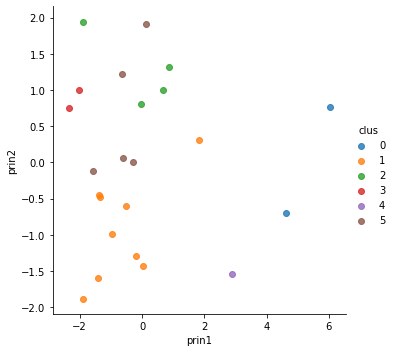

In [23]:
sns.lmplot('prin1','prin2',data=Xpca, fit_reg=False, hue='clus')

In [24]:
df=df.merge(Xs[['clus']],left_index=True,right_index=True, how='inner')

In [25]:
df.sort_values(['clus'])

,Equipo,Goles,Tiros,Tiros_buenos,Faltas,Corners,Amarillas,Rojas,clus
12,Liverpool,2.350000,15.350000,6.033333,8.300000,6.433333,1.000000,0.050000,0
13,Man City,2.606557,18.737705,6.934426,9.180328,7.803279,1.393443,0.049180,0
11,Leicester,1.622951,13.622951,5.049180,9.475410,5.721311,1.295082,0.081967,1
2,Bournemouth,1.245902,11.131148,3.868852,9.049180,5.049180,1.737705,0.049180,1
4,Burnley,1.163934,9.622951,3.114754,10.196721,4.131148,1.901639,0.016393,1
5,Cardiff,0.894737,10.973684,3.315789,10.105263,4.421053,1.710526,0.026316,1
17,Sheffield United,1.086957,10.130435,3.304348,10.869565,5.478261,1.869565,0.043478,1
7,Crystal Palace,1.196721,11.622951,3.606557,10.393443,5.016393,1.524590,0.049180,1
16,Norwich,1.000000,11.695652,4.043478,9.782609,4.565217,1.956522,0.043478,1
15,Newcastle,1.049180,10.885246,3.524590,10.360656,4.163934,1.524590,0.065574,1


In [26]:
df.to_csv('clus.csv')